## 1. Импорт  библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

In [2]:
file_name = 'full_metrics_1G.xlsx'

full_df = pd.read_excel(file_name).drop('Unnamed: 0', axis=1)
full_df

,alg_name,iter,rmse,mae,mape,r2
0,G_RF,1,0.23121,0.19068,1.921563e+14,0.38954
1,G_RF,2,0.23057,0.19024,1.911273e+14,0.39276
2,G_RF,3,0.22995,0.18960,1.894230e+14,0.39653
3,G_RF,4,0.22807,0.18816,1.884020e+14,0.40689
4,G_RF,5,0.22954,0.18929,1.900206e+14,0.39859
...,...,...,...,...,...,...
95,G_KAN,21,0.17502,0.13968,1.377267e+14,0.64592
96,G_KAN,22,0.17990,0.14405,1.367766e+14,0.63201
97,G_KAN,23,0.18217,0.14539,1.412862e+14,0.62009
98,G_KAN,24,0.17417,0.13901,1.367952e+14,0.64802


In [45]:
def bar_plot_full_metr(full_df, title=None, l_color=None, rot=0, tick_order_name=[3,0,2,1], tick_label=None):
    '''Plots result bars from full_metrics df 
    API: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
    https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
    '''
    l_add_errors = ['mae', 'rmse']
    l_r2_errors = ['r2']   

    gp = full_df.drop(['iter'], axis=1).groupby(['alg_name'])
    means = gp.mean()
    errors = gp.std()

    means = means.loc[means.index[tick_order_name]]
    errors = errors.loc[means.index[tick_order_name]]

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
    fig.suptitle(title, fontsize=20)
    means[l_add_errors].plot.bar(yerr=errors[l_add_errors], ax=ax[0], capsize=4, rot=rot, color=l_color, tick_label=tick_label)
    means[l_r2_errors].plot.bar(yerr=errors[l_r2_errors], ax=ax[1], capsize=4, rot=rot, color=l_color, tick_label=tick_label)

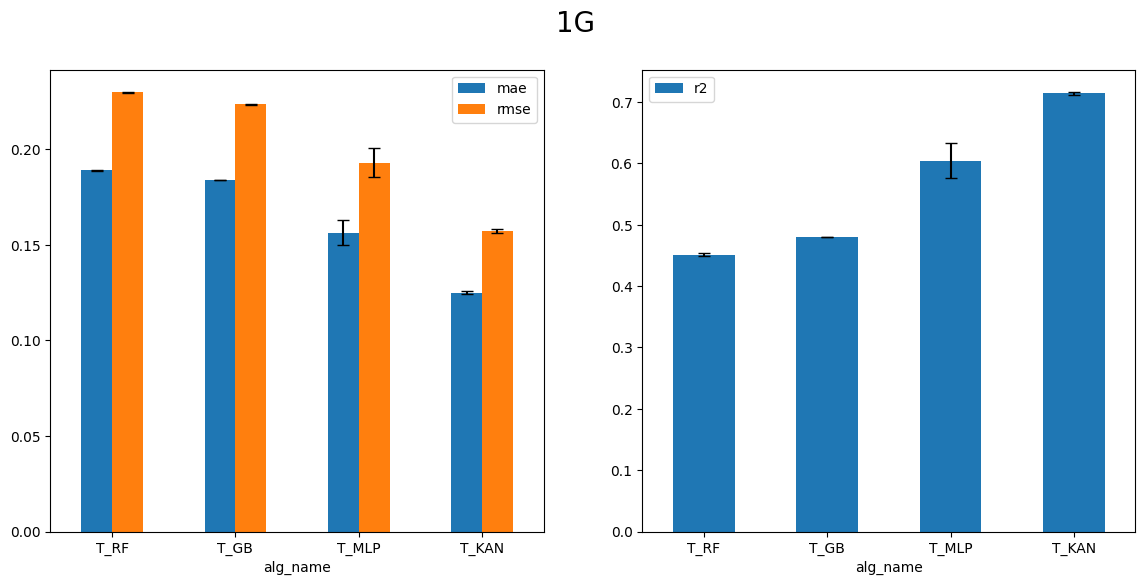

In [38]:
bar_plot_full_metr(full_df, title='1G')

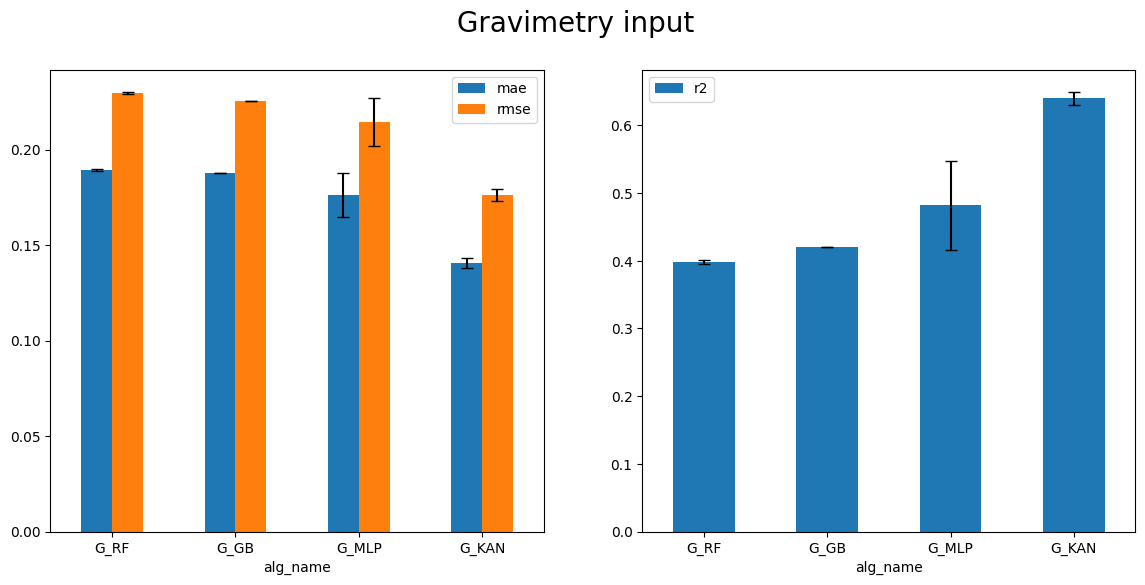

In [39]:
file_name = 'full_metrics_1G.xlsx'

full_df = pd.read_excel(file_name).drop('Unnamed: 0', axis=1)
bar_plot_full_metr(full_df, title='Gravimetry input')

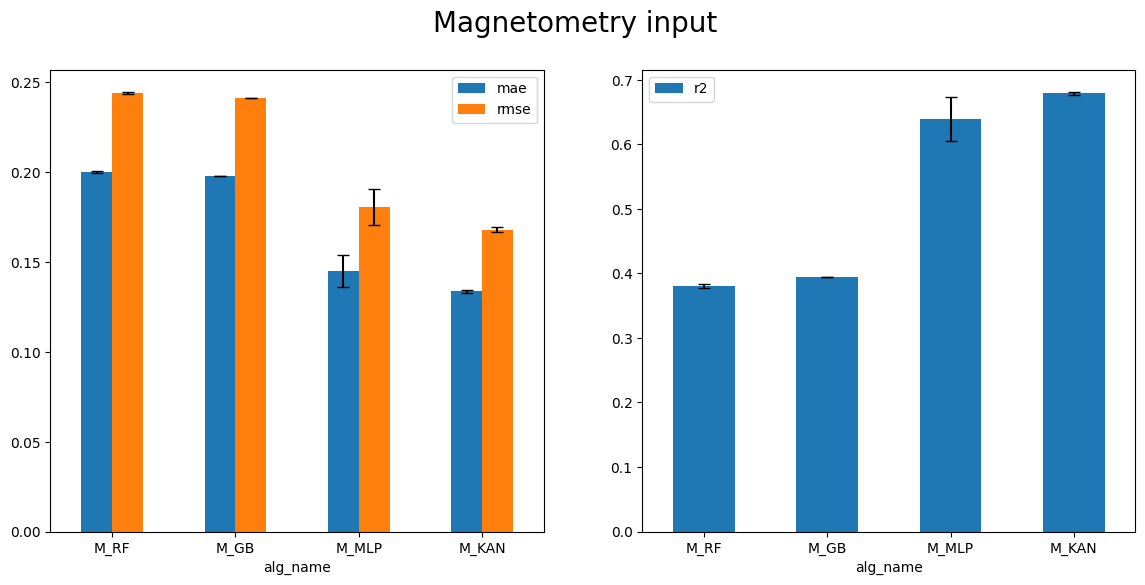

In [40]:
file_name = 'full_metrics_1M.xlsx'

full_df = pd.read_excel(file_name).drop('Unnamed: 0', axis=1)
bar_plot_full_metr(full_df, title='Magnetometry input')

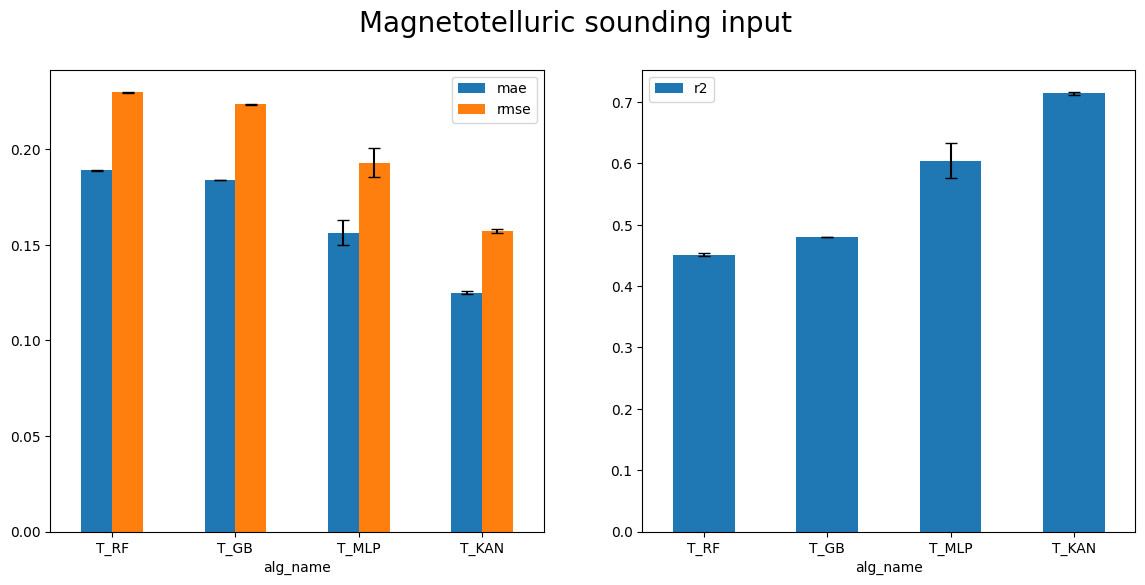

In [41]:
file_name = 'full_metrics_1T.xlsx'

full_df = pd.read_excel(file_name).drop('Unnamed: 0', axis=1)
bar_plot_full_metr(full_df, title='Magnetotelluric sounding input')

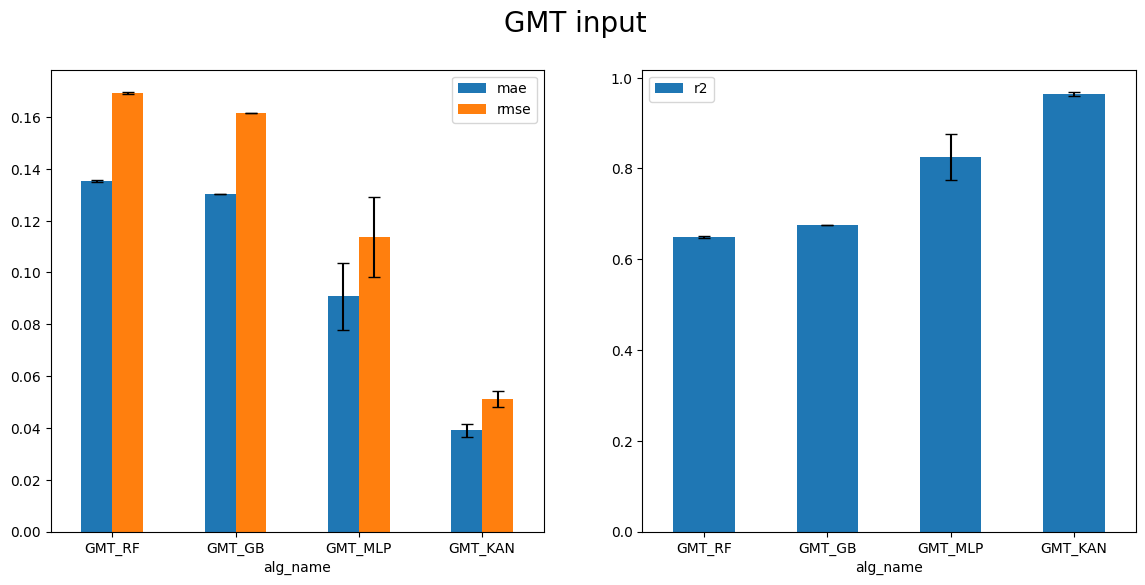

In [43]:
file_name = 'full_metrics_2.xlsx'

full_df = pd.read_excel(file_name).drop('Unnamed: 0', axis=1)
bar_plot_full_metr(full_df, title='GMT input')

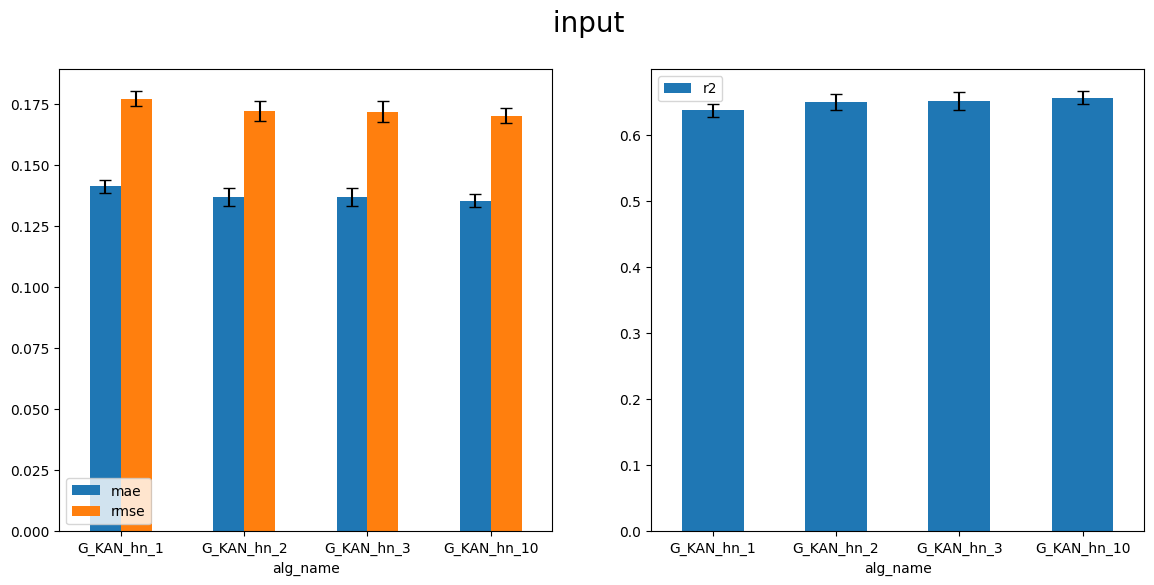

In [50]:
file_name = 'full_metrics_3.xlsx'

full_df = pd.read_excel(file_name).drop('Unnamed: 0', axis=1)
bar_plot_full_metr(full_df, title='Gravimetry input, ', tick_order_name=[0,2,3,1])

------

In [23]:
gp = full_df.drop(['iter'], axis=1).groupby(['alg_name'])
means = gp.mean()
errors = gp.std()

In [35]:
means.index[[3,0,2,1]]

Index(['T_RF', 'T_GB', 'T_MLP', 'T_KAN'], dtype='object', name='alg_name')

In [36]:
means.loc[means.index[[3,0,2,1]]]

,rmse,mae,mape,r2
alg_name,,,,
T_RF,0.229518,0.188796,1.692916e+14,0.451004
T_GB,0.223229,0.183996,1.675340e+14,0.479457
T_MLP,0.192912,0.156197,1.322950e+14,0.604410
T_KAN,0.157028,0.124946,1.064757e+14,0.714410


<Axes: xlabel='alg_name'>

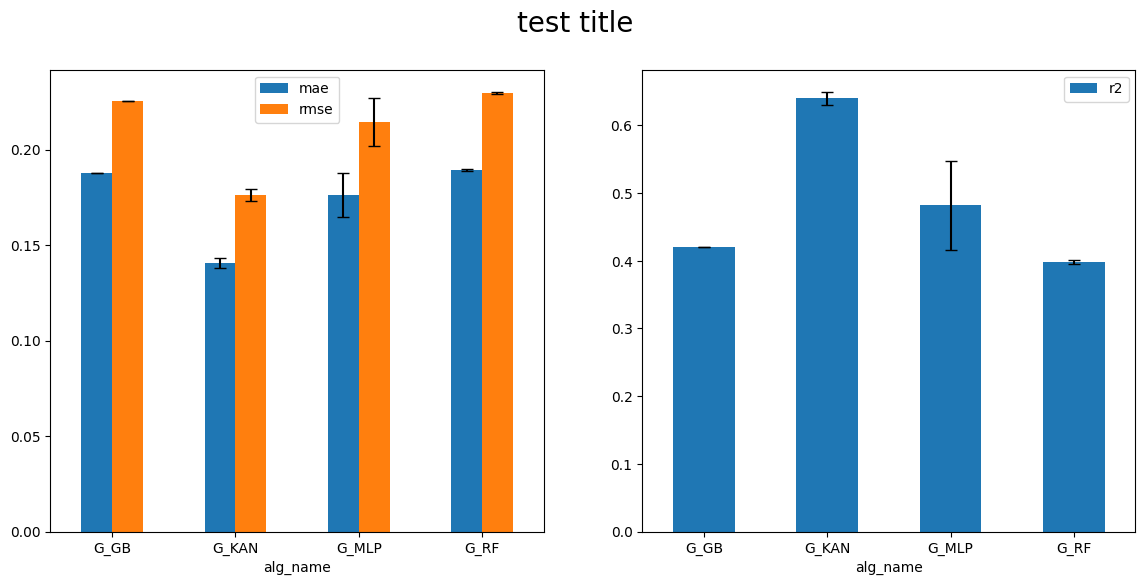

In [10]:
l_add_errors = ['mae', 'rmse']
l_r2_errors = ['r2']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

fig.suptitle('test title', fontsize=20)
means[l_add_errors].plot.bar(yerr=errors[l_add_errors], ax=ax[0], capsize=4, rot=0)
means[l_r2_errors].plot.bar(yerr=errors[l_r2_errors], ax=ax[1], capsize=4, rot=0)